In [5]:
#Generate random list of coordinates and cities
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




In [6]:
#Generate City list by using citipy

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


In [66]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url + city).json()
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind_speed = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | debark'
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | thaba-tseka
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | ouellah
City not found. Skipping...
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | mata-utu
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | bothaville
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | gorontalo
Processing Record 22 of Set 1 | 

In [67]:
# Convert the cities weather data into a Pandas DataFrame
# convert city_data to json
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,13.35,64,76,3.84,ZA,1682032888
1,debark',13.1561,37.8981,13.90,18,7,1.77,ET,1682032888
2,ust-nera,64.5667,143.2000,-6.11,94,100,3.43,RU,1682032888
3,grytviken,-54.2811,-36.5092,1.84,82,100,4.11,GS,1682032889
4,thaba-tseka,-29.5220,28.6084,8.78,49,79,2.40,LS,1682032817


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,13.35,64,76,3.84,ZA,1682032888
1,debark',13.1561,37.8981,13.90,18,7,1.77,ET,1682032888
2,ust-nera,64.5667,143.2000,-6.11,94,100,3.43,RU,1682032888
3,grytviken,-54.2811,-36.5092,1.84,82,100,4.11,GS,1682032889
4,thaba-tseka,-29.5220,28.6084,8.78,49,79,2.40,LS,1682032817


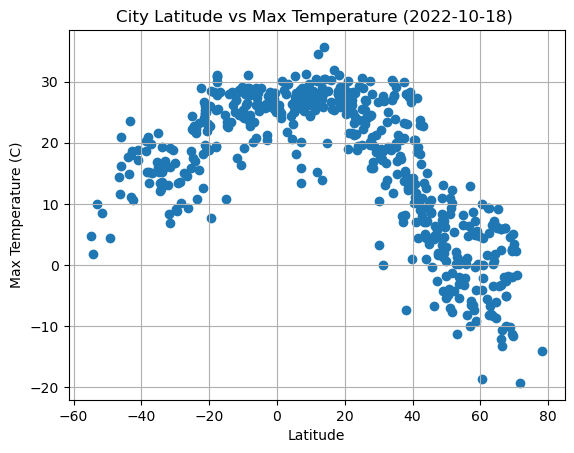

In [58]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Max Temperature (2022-10-18) ')

# Save the figure
plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

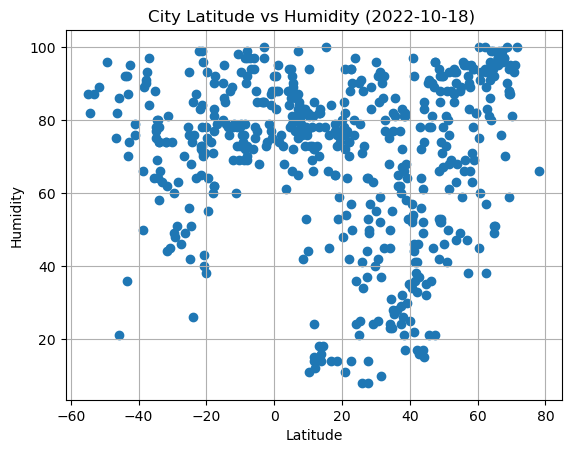

In [59]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Humidity (2022-10-18) ')
# Save the figure
plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

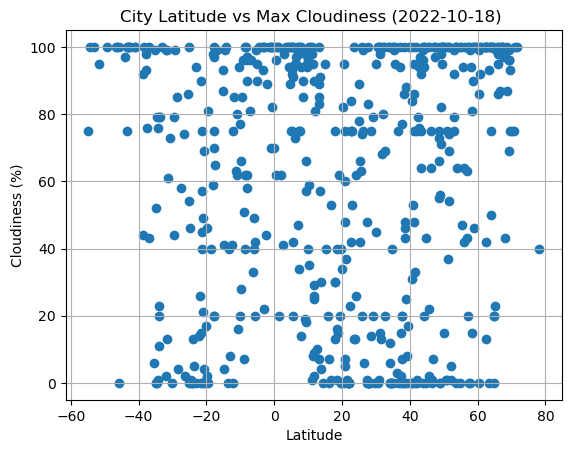

In [60]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Max Cloudiness (2022-10-18) ')

# Save the figure
plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

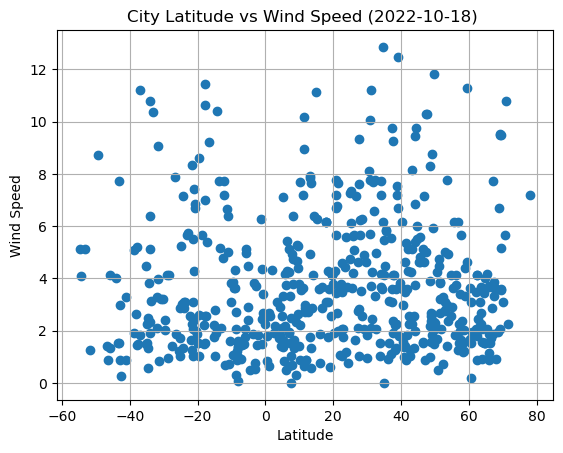

In [71]:
# Build the scatter plots for latitude vs. Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Wind Speed (2022-10-18) ')

# Save the figure
plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

In [111]:
# Define a function to create Linear Regression plots
import scipy.stats as st

def myLinReg(x_values, y_values):
    # Calculate the corelation and then print it
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

    # Calculate Regression 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    return regress_values, line_eq




In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

#create for loop to get latitude data
northern_hemi_df = pd.DataFrame()

for index, row in city_data_df.iterrows():
    city_lat = row['Lat']

    if city_lat >= 0:
        #keep the row
        northern_hemi_df = pd.concat([northern_hemi_df, row.to_frame().T])

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,debark',13.1561,37.8981,13.9,18,7,1.77,ET,1682032888
2,ust-nera,64.5667,143.2,-6.11,94,100,3.43,RU,1682032888
6,tura,25.5198,90.2201,22.33,91,63,3.62,IN,1682032889
7,yellowknife,62.456,-114.3525,6.29,36,20,4.12,CA,1682032889
8,tiksi,71.6872,128.8694,-19.27,100,100,2.26,RU,1682032889


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

#create for loop to get latitude data
southern_hemi_df = pd.DataFrame()

for index, row in city_data_df.iterrows():
    city_lat = row['Lat']

    if city_lat < 0:
        #keep the row
        southern_hemi_df = pd.concat([southern_hemi_df, row.to_frame().T])

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,13.35,64,76,3.84,ZA,1682032888
3,grytviken,-54.2811,-36.5092,1.84,82,100,4.11,GS,1682032889
4,thaba-tseka,-29.522,28.6084,8.78,49,79,2.4,LS,1682032817
5,port-aux-francais,-49.35,70.2167,4.36,96,100,8.74,TF,1682032889
9,edinburgh of the seven seas,-37.0676,-12.3116,19.73,97,100,11.22,SH,1682032889


The correlation between both factors is -0.86


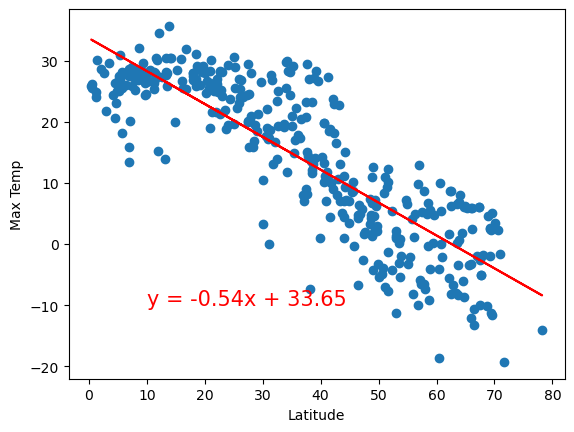

In [182]:
# Linear regression on  Hemisphere
# Temp vs Lat of North Hemi
#Call on previously defined function 
northern_city_max_temp = northern_hemi_df['Max Temp'].astype(float)
northern_city_lat = northern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(northern_city_lat, northern_city_max_temp)

# Plot the scatter plot
plt.scatter(northern_city_lat, northern_city_max_temp,)
# Plot the regression line
plt.plot(northern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show()

In [ ]:
#Discuss linear regression here
# In the Northern Hemisphere, As max temp increases, latitude decreases. As max temp decreases, latitude increases. There is an inverse relationship between the two variables. 

The correlation between both factors is 0.72
y = 0.35x + 28.41


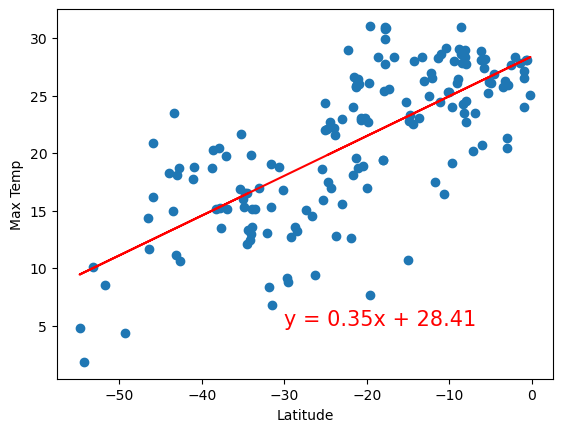

In [165]:
# Linear regression on Southern Hemisphere
# Temp vs Lat of North Hemi
#Call on previously defined function 
southern_city_max_temp = southern_hemi_df['Max Temp'].astype(float)
southern_city_lat = southern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(southern_city_lat,southern_city_max_temp)
print(line_eq)
# Plot the scatter plot
plt.scatter(southern_city_lat,southern_city_max_temp)
# Plot the regression line
plt.plot(southern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,
5),fontsize=15,color="red")
# Add labels and titles
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show()

In [ ]:
#discuss linear regression here
#In the Southern Hemisphere, As max temp increases, latitude increases. As max temp decreases, latitude decreases. There is positive correlation between the two variables. 

The correlation between both factors is 0.14


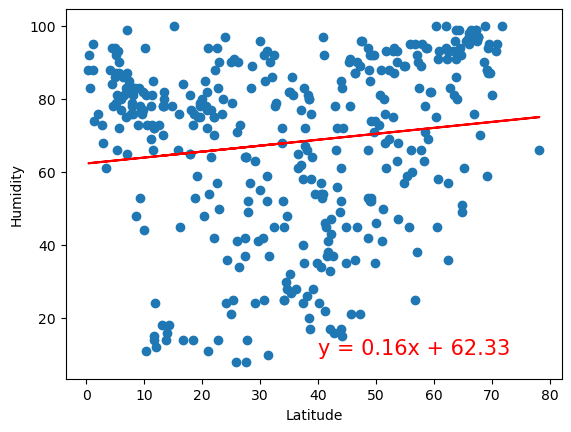

In [169]:
#Humidity vs Latitude Linear Regression Plot Northern Hemi 
#Call on previously defined function 
northern_city_max_temp = northern_hemi_df['Humidity'].astype(float)
northern_city_lat = northern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(northern_city_lat,northern_city_max_temp)

# Plot the scatter plot
plt.scatter(northern_city_lat,northern_city_max_temp)
# Plot the regression line
plt.plot(northern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

The correlation between both factors is 0.2


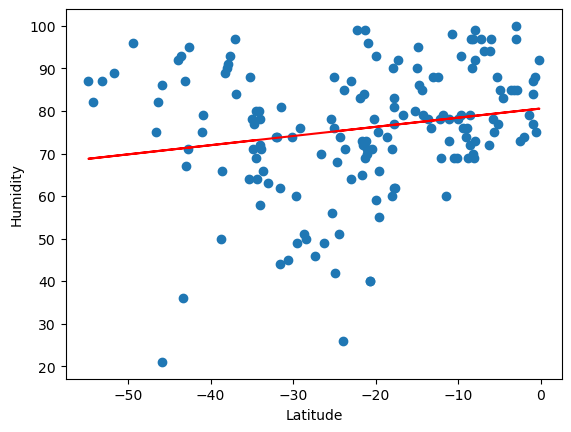

In [170]:
# Southern Hemisphere Humidity vs Latitude Linear Regression Plot
#Call on previously defined function 
southern_city_max_temp = southern_hemi_df['Humidity'].astype(float)
southern_city_lat = southern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(southern_city_lat,southern_city_max_temp)

# Plot the scatter plot
plt.scatter(southern_city_lat,southern_city_max_temp)
# Plot the regression line
plt.plot(southern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

In [ ]:
#Discuss linear regression between Northern and Southern Hemisphere as it relates to humidity and latitude. 
# The Northern Hemisphere sees a positive correlation as humidity rises and so does Latitude. The Southern Hemisphere also sees a positive correlation. 


The correlation between both factors is 0.12


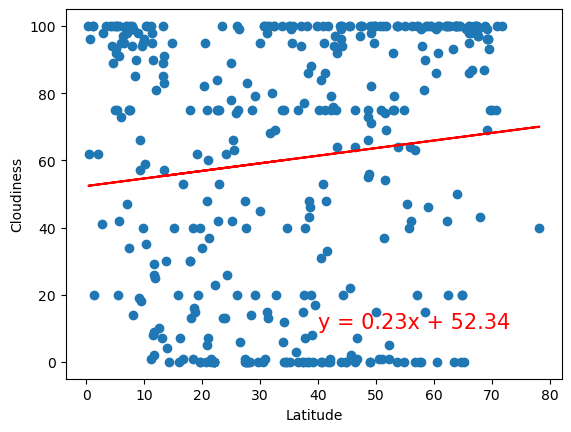

In [174]:
#Nothern Hemisphere Cloudiness vs Latitude Linear Regression Plot
#Call on previously defined function 
northern_city_max_temp = northern_hemi_df['Cloudiness'].astype(float)
northern_city_lat = northern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(northern_city_lat,northern_city_max_temp)

# Plot the scatter plot
plt.scatter(northern_city_lat,northern_city_max_temp)
# Plot the regression line
plt.plot(northern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()



The correlation between both factors is -0.04


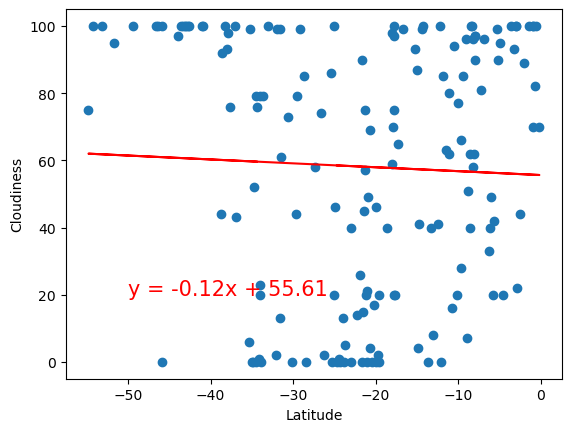

In [176]:
#Southern Hemisphere Cloudiness vs Latitude Linear Regression Plot
#Call on previously defined function
 # Southern Hemisphere Humidity vs Latitude Linear Regression Plot
#Call on previously defined function 
southern_city_max_temp = southern_hemi_df['Cloudiness'].astype(float)
southern_city_lat = southern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(southern_city_lat,southern_city_max_temp)

# Plot the scatter plot
plt.scatter(southern_city_lat,southern_city_max_temp)
# Plot the regression line
plt.plot(southern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

In [ ]:
#Discuss linear regression between Northern and Southern Hemisphere as it relates to cloudiness and latitude. 
# The Northern Hemisphere sees a positive correlation as cloudiness rises and so does Latitude. The Southern Hemisphere has a negative regression as cloudiness decreases as latitude increases.


The correlation between both factors is 0.03


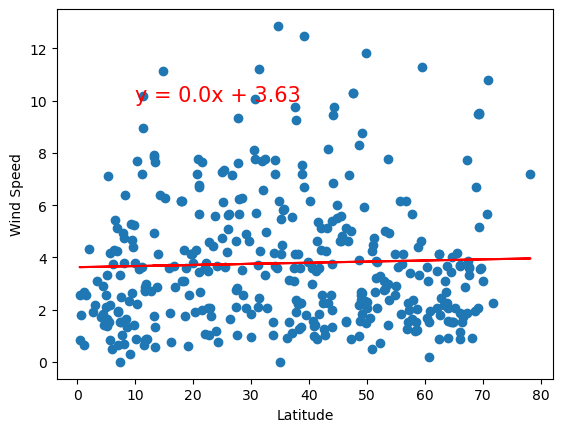

In [178]:
#Northern Hemi Wind Speed vs Lat Linear Regression Plot

#Call on previously defined function 
northern_city_max_temp = northern_hemi_df['Wind Speed'].astype(float)
northern_city_lat = northern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(northern_city_lat,northern_city_max_temp)

# Plot the scatter plot
plt.scatter(northern_city_lat,northern_city_max_temp)
# Plot the regression line
plt.plot(northern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

The correlation between both factors is -0.08


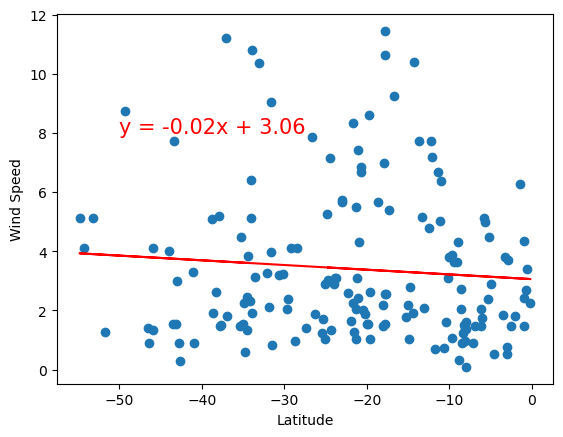

In [181]:

#Southern Hemisphere Wind Speed vs Latitude Linear Regression Plot
#Call on previously defined function

#Call on previously defined function 
southern_city_max_temp = southern_hemi_df['Wind Speed'].astype(float)
southern_city_lat = southern_hemi_df['Lat'].astype(float)

regress_values, line_eq = myLinReg(southern_city_lat,southern_city_max_temp)

# Plot the scatter plot
plt.scatter(southern_city_lat,southern_city_max_temp)
# Plot the regression line
plt.plot(southern_city_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
# Add labels and title
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

In [ ]:
#Discuss linear regression between Northern and Southern Hemisphere as it relates to Windspeed and latitude. 
# The Northern Hemisphere does not see much correlation between wind speed and latitude.The Southern Hemisphere has a negative regression as windspeed decreases as latitude increases.
